In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("covid_19_data.csv")
df = df.drop(["SNo"], axis=1)
df

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
...,...,...,...,...,...,...,...
4930,03/11/20,Mississippi,US,2020-03-10T02:33:04,0,0,0
4931,03/11/20,North Dakota,US,2020-03-10T02:33:04,0,0,0
4932,03/11/20,West Virginia,US,2020-03-10T02:33:04,0,0,0
4933,03/11/20,Wyoming,US,2020-03-10T02:33:04,0,0,0


In [9]:
df.isna().sum()

ObservationDate       0
Province/State     1815
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [15]:
##listing the countries affected by covid
print("Number of countries affected by covid: ", len(df["Country/Region"].unique()))
print("Countries affected by the virus: ",df["Country/Region"].sort_values().unique())


Number of countries affected by covid:  128
Countries affected by the virus:  [' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Channel Islands' 'Chile' 'Colombia'
 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia'
 'Faroe Islands' 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany'
 'Gibraltar' 'Greece' 'Holy See' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macau' 'Mainland China'
 'Malaysia' 'Maldives' 'Malta' 'Martinique' 'Mexico' 'Moldova' 'Monaco'
 'Mongolia' 'Morocco' 'Nepal' 'Nether

In [16]:
df.fillna('NA', inplace= True)
df.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


In [22]:
df_count = df.groupby(["Country/Region"], as_index= False).sum().sort_values(by="Confirmed", ascending = False)#.reset_index(drop=True)
df_count.head(10)

,Country/Region,Confirmed,Deaths,Recovered
69,Mainland China,2554465,80616,961283
110,South Korea,80824,529,1496
57,Italy,66824,3239,5454
53,Iran,54206,1912,15142
87,Others,17780,102,619
40,France,9688,177,234
43,Germany,8857,7,368
111,Spain,7619,155,349
60,Japan,7040,118,1034
122,US,5505,176,174


<BarContainer object of 4935 artists>

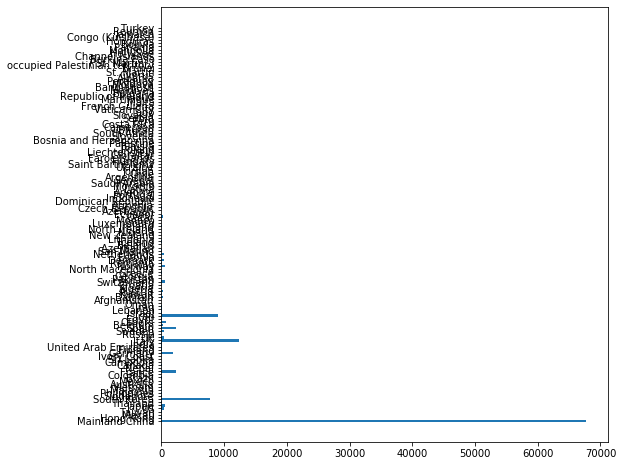

In [26]:
%matplotlib inline  
#fig = plt.figure()
fig, ax = plt.subplots(figsize=(8, 8))
df = df[::-1]
ax.barh(df['Country/Region'], df['Confirmed'])